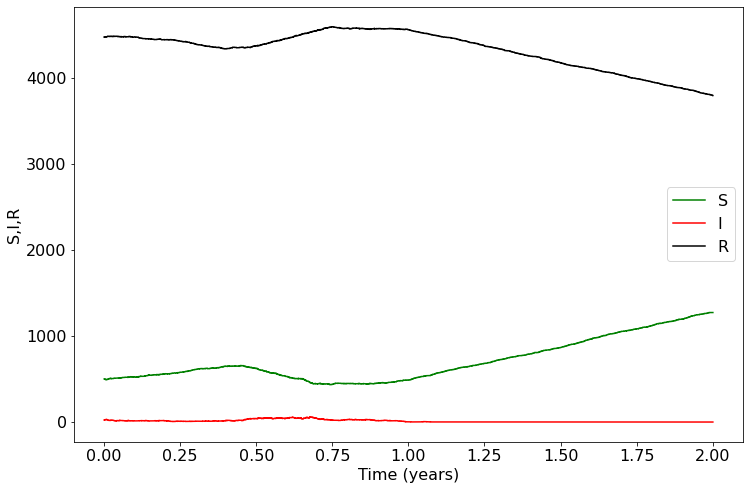

Covarience between S and I:  -2251.9352560809693


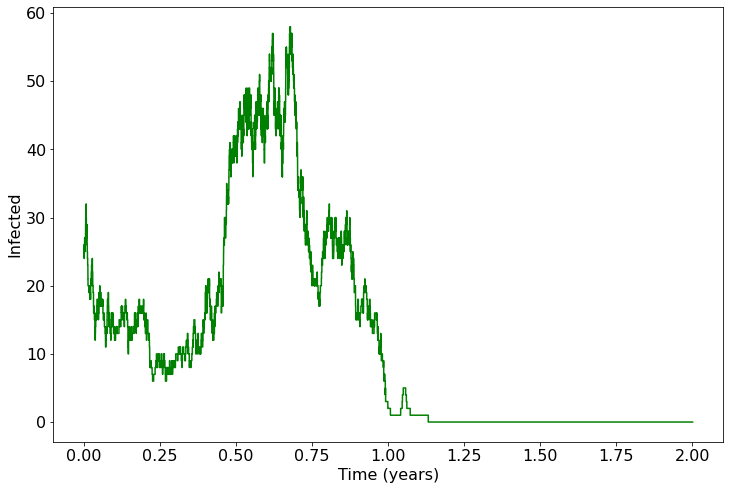

In [23]:

import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

def find(condition):
    res, = np.nonzero(np.ravel(condition))
    return res

beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000

ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
pl.seed(11)
timestep=0.0
def stoc_eqs(INP,ts):  
	V=INP
	N=np.sum(V[range(3)])
	Rate1 = beta*V[0]*V[1]/N
	Rate2 = gamma*V[1]
	Rate3 = mu*N
	Rate4 = mu*V[0]
	Rate5 = mu*V[1]
	Rate6 = mu*V[2]
	R1=pl.rand()
	R2=pl.rand()
	s = Rate1 + Rate2 + Rate3 + Rate4 + Rate5 + Rate6
	ts = -np.log(R2)/s
	if R1<(Rate1/s):
		V[1] += 1
		V[0] -= 1# do infection
	elif R1<(Rate2+Rate1)/s:
		V[1] -= 1
		V[2] += 1 # do recovery
	elif R1< (Rate2+Rate1+Rate3)/s:
		V[0] += 1 # birth
	elif R1< (Rate2+Rate1+Rate3+Rate4)/s:
		V[0] -= 1 # die S
	elif R1< (Rate2+Rate1+Rate3+Rate4+Rate5)/s:
		V[1] -= 1 #die I 
	else:
		V[2] -= 1 #die R 
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	while T[lop] < ND :
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
	return [T,S,I,R]

[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
plt.figure(figsize = (12, 8))

plt.plot(tT, tS, 'g',label="S")
#pl.xlabel ('Time (years)')
#pl.ylabel ('Susceptible')
#pl.show()
plt.plot(tT, tI, 'r',label="I")
#pl.xlabel ('Time (years)')
#pl.ylabel ('Infectious')
#pl.show()
plt.plot(tT, tR, 'k',label="R")
plt.xlabel ('Time (years)')
plt.ylabel ('S,I,R')
plt.legend()
plt.show()
print(f"Covarience between S and I:  {np.cov( tS, tI)[1,0]}")
plt.figure(figsize = (12, 8))

plt.plot(tT, tI, 'g',label="S")
plt.xlabel ('Time (years)')
plt.ylabel ('Infected')
plt.show()





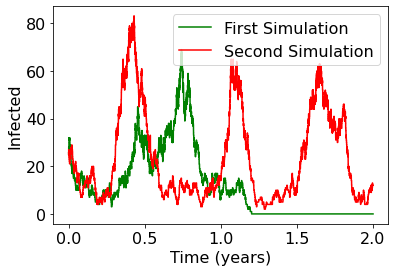

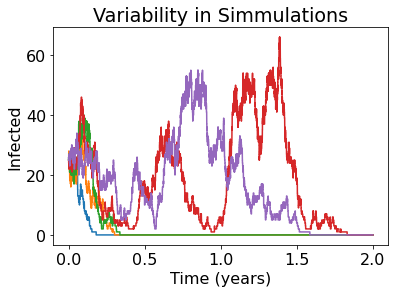

In [24]:
#Variability in simulations

beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000
pl.seed(11000)

ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
[T,S,I,R]=Stoch_Iteration(INPUT)
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
[T2,S2,I2,R2]=Stoch_Iteration(INPUT)
tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
tT2=np.array(T2)[1:,]/365.
tS2=np.array(S2)[1:,]
tI2=np.array(I2)[1:,]
tR2=np.array(R2)[1:,]
plt.plot(tT, tI, 'g',label="First Simulation")
plt.plot(tT2, tI2, 'r',label="Second Simulation")
plt.legend()
plt.xlabel ('Time (years)')
plt.ylabel ('Infected')
plt.show()

for i in range(5):
    INPUT = np.array((X0,Y0,Z0))
    [T,S,I,R]=Stoch_Iteration(INPUT)
    tT=np.array(T)[1:,]/365.
    tS=np.array(S)[1:,]
    tI=np.array(I)[1:,]
    tR=np.array(R)[1:,]
    plt.plot(tT, tI,label="First Simulation")
plt.title("Variability in Simmulations")
plt.xlabel ('Time (years)')
plt.ylabel ('Infected')
plt.show()

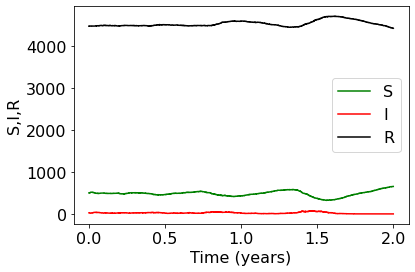

Covarience between S and I:  -516.8443162358736


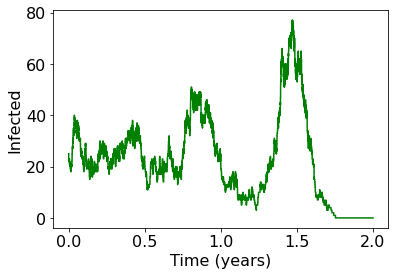

In [25]:
#direct
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000

ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0


INPUT = np.array((X0,Y0,Z0))
timestep=0.0

def stoc_eqs(INP,ts):  
	V=INP
	N=np.sum(V[range(3)])
	Rate1 = beta*V[0]*V[1]/N
	Rate2 = gamma*V[1]
	Rate3 = mu*N
	Rate4 = mu*V[0]
	Rate5 = mu*V[1]
	Rate6 = mu*V[2]
	R1=pl.rand()
	R2=pl.rand()
	s = Rate1 + Rate2 + Rate3 + Rate4 + Rate5 + Rate6
	ts = -np.log(R2)/s
	if R1<(Rate1/s):
		V[1] += 1
		V[0] -= 1# do infection
	elif R1<(Rate2+Rate1)/s:
		V[1] -= 1
		V[2] += 1 # do recovery
	elif R1< (Rate2+Rate1+Rate3)/s:
		V[0] += 1 # birth
	elif R1< (Rate2+Rate1+Rate3+Rate4)/s:
		V[0] -= 1 # die S
	elif R1< (Rate2+Rate1+Rate3+Rate4+Rate5)/s:
		V[1] -= 1 #die I 
	else:
		V[2] -= 1 #die R 
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	while T[lop] < ND :
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
	return [T,S,I,R]

[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

plt.plot(tT, tS, 'g',label="S")
#pl.xlabel ('Time (years)')
#pl.ylabel ('Susceptible')
#pl.show()
plt.plot(tT, tI, 'r',label="I")
#pl.xlabel ('Time (years)')
#pl.ylabel ('Infectious')
#pl.show()
plt.plot(tT, tR, 'k',label="R")
plt.xlabel ('Time (years)')
plt.ylabel ('S,I,R')
plt.legend()
plt.show()
print(f"Covarience between S and I:  {np.cov( tS, tI)[1,0]}")
plt.plot(tT, tI, 'g',label="S")
plt.xlabel ('Time (years)')
plt.ylabel ('Infected')
plt.show()

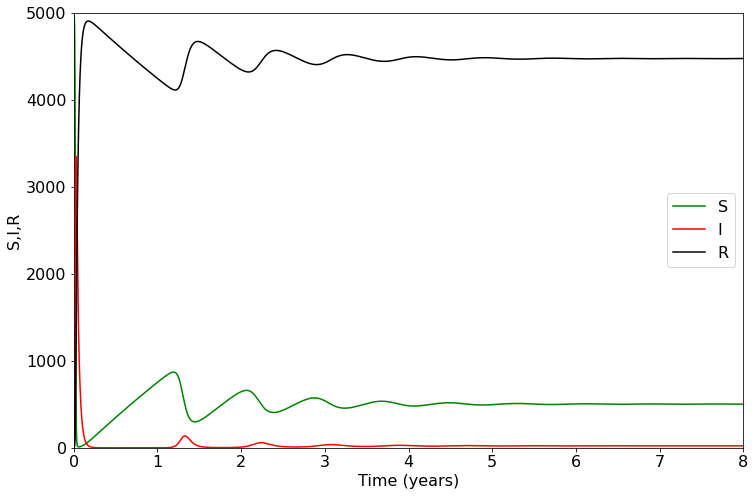

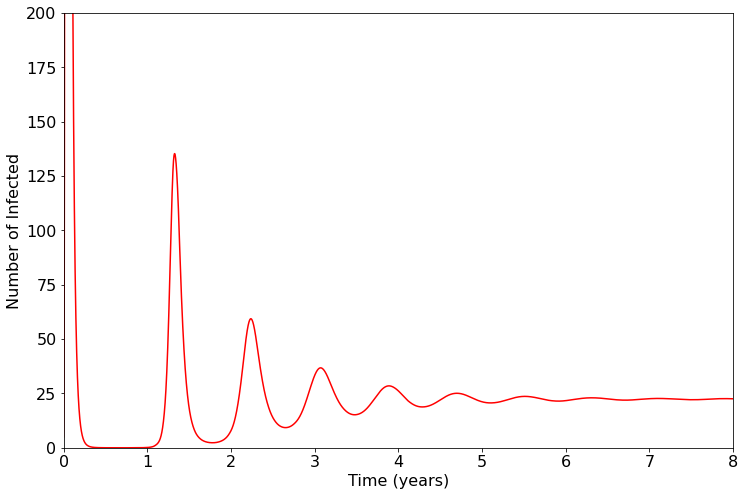

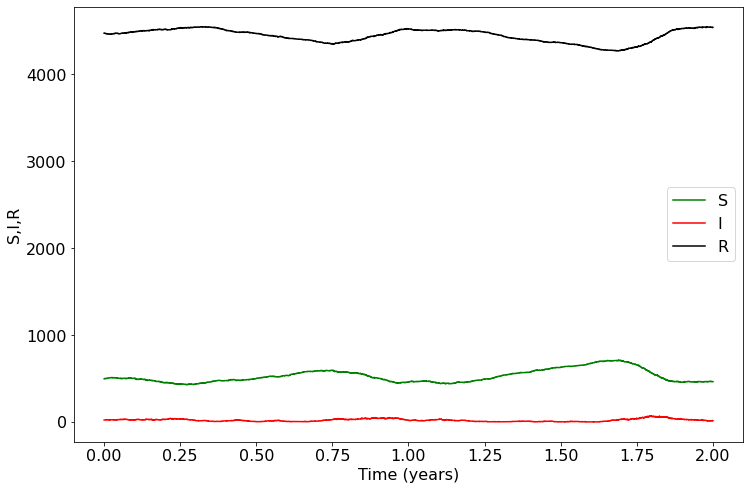

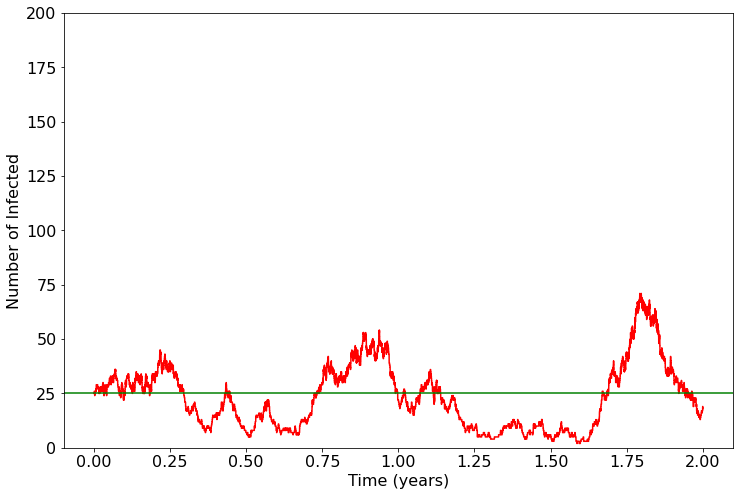

In [26]:
#resonance
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin
import scipy.integrate as integrate
from math import *
from scipy.integrate import solve_ivp
pl.seed(79)

N0=5000
beta=1.0
gamma=1/10.0
mu=5e-4
F = lambda t, s: np.dot(np.array([[-mu, -beta*s[0], 0], [0,beta*s[0] - gamma -mu, 0],[0, gamma, -mu]]) , s) + np.array([mu,0,0])
t_eval = np.arange(0, 10000, 0.01)
sol = solve_ivp(F, [0, 10000 ], [0.999, 0.001,0], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(sol.t/365, sol.y.T[:, 0]*N0,'g', label = "S")
plt.plot(sol.t/365, sol.y.T[:, 1]*N0,'r', label = "I")
plt.plot(sol.t/365, sol.y.T[:, 2]*N0,'k', label = "R")
plt.ylabel('S,I,R')
plt.xlabel('Time (years)')
plt.ylim([0, 5000])
plt.xlim([0, 8])
plt.legend()
plt.show()
plt.figure(figsize = (12, 8))
plt.plot(sol.t/365, sol.y.T[:, 1]*N0,'r', label = "I")
plt.ylim([0, 200])
plt.xlim([0, 8])
plt.ylabel('Number of Infected')
plt.xlabel('Time (years)')
plt.show()
""""ND=MaxTime=2*365.0
Y0=1
X0=4999
Z0=0
N0=X0+Y0+Z0
"""
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0
timestep=0.0
INPUT = np.array((X0,Y0,Z0))
[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

plt.figure(figsize = (12, 8))
plt.plot(tT, tS, 'g',label="S")
plt.plot(tT, tI, 'r',label="I")
plt.plot(tT, tR, 'k',label="R")
plt.xlabel ('Time (years)')
plt.ylabel ('S,I,R')
plt.legend()

plt.show()
plt.figure(figsize = (12, 8))
plt.plot(tT, tI, 'r',label="S")
plt.xlabel ('Time (years)')
plt.ylabel('Number of Infected')
plt.ylim([0, 200])
plt.axhline(y=25, color='g', linestyle='-')

plt.show()


# Extinctions

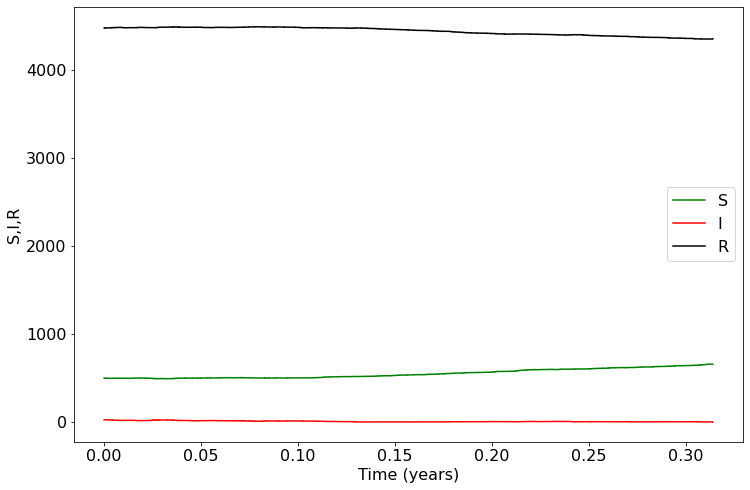

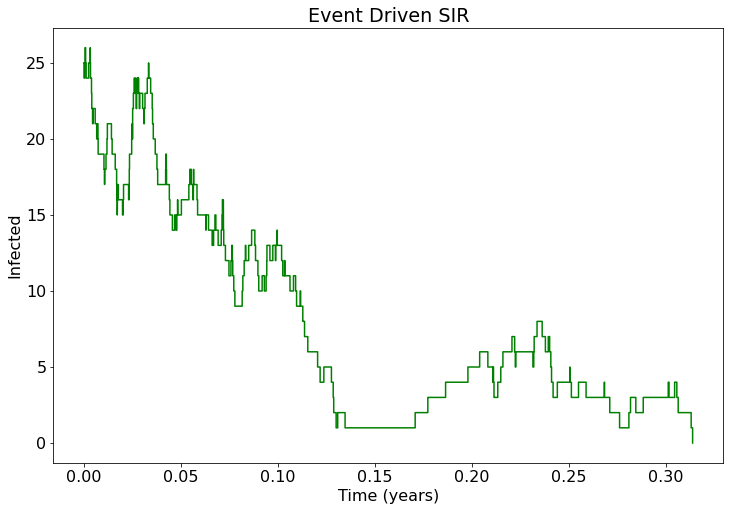

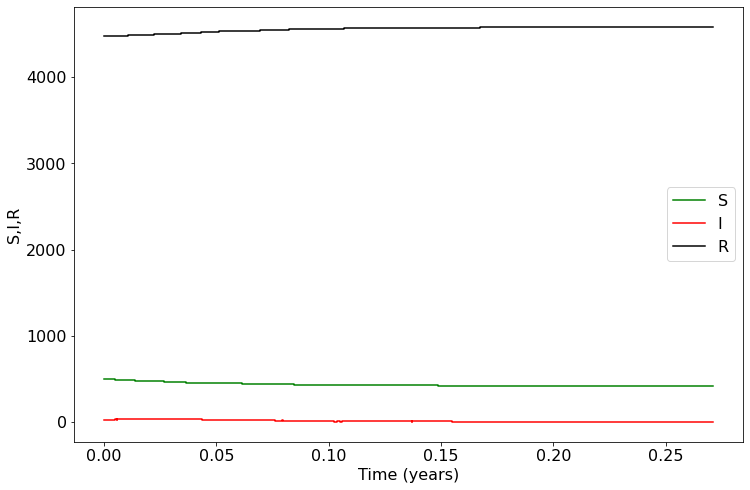

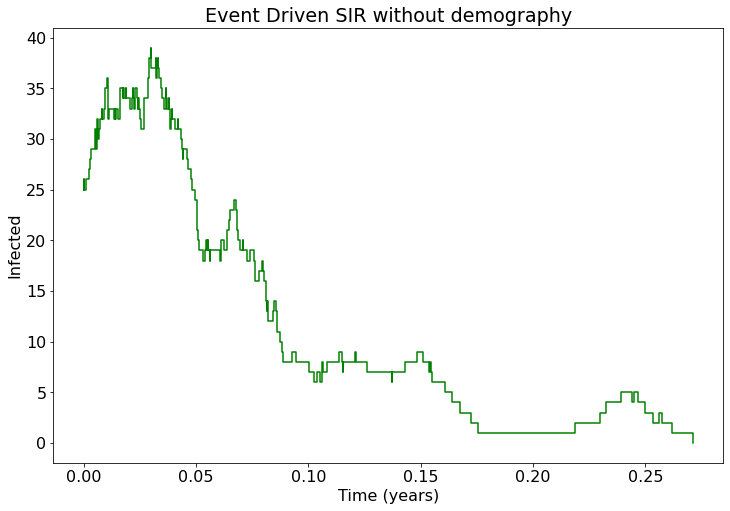

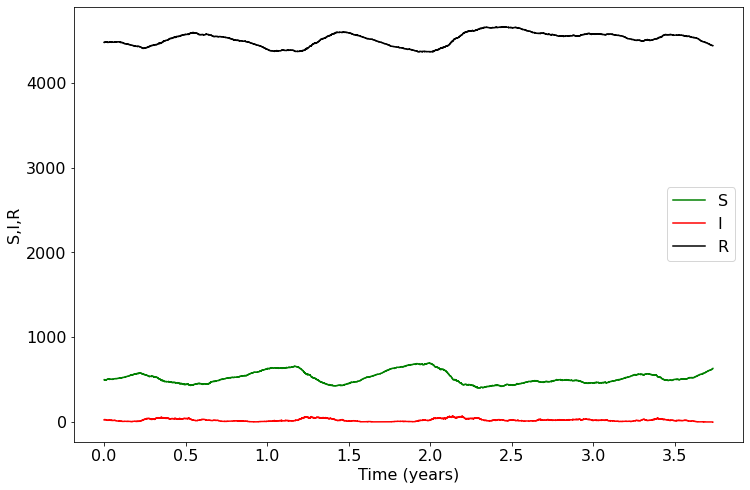

No demography Mean Extinction time:0.3238078758626143
std: 0.11749305127053897
Dempgrpahy Mean Extinction time:1.4617381002948713
std: 1.114465700801662
Imports Mean Extinction time:1.3644607547244976
std: 1.0355336733798954


Text(0.5, 1.0, 'Histogram of extinction time')

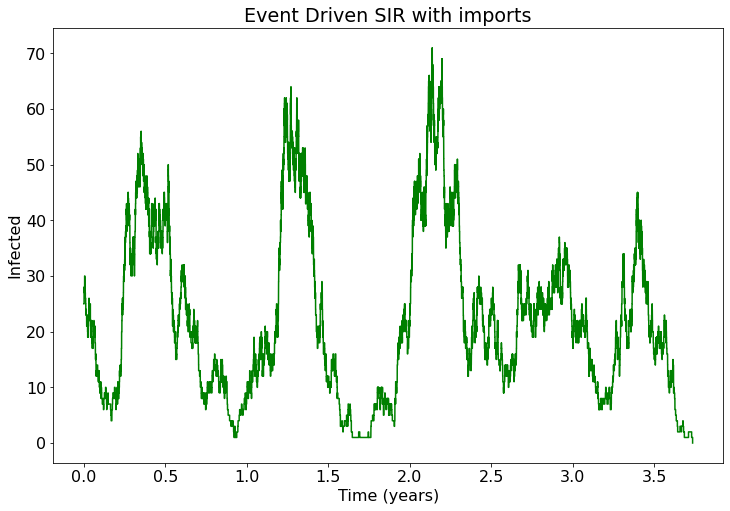

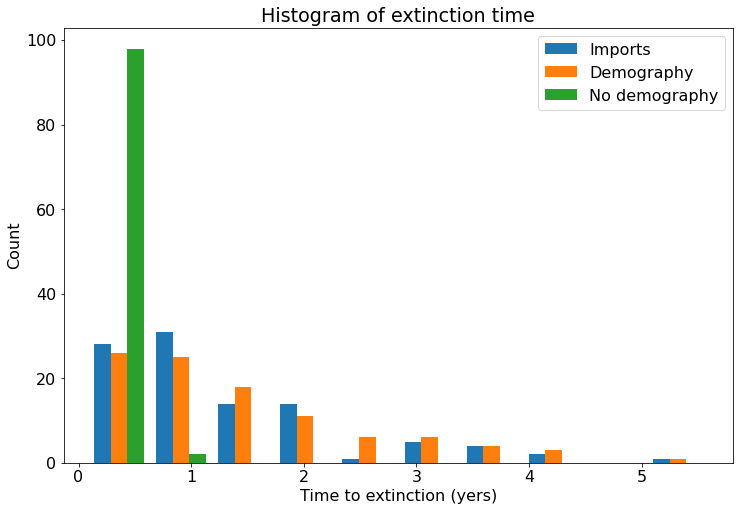

In [27]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000

ND=MaxTime=10*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

timestep=0.0

def stoc_eqs_nodem(INP,ts):  
	V=INP
	N=np.sum(V[range(3)])
	Rate1 = beta*V[0]*V[1]/N
	Rate2 = gamma*V[1]
	R1=pl.rand()
	R2=pl.rand()
	s = Rate1 + Rate2 
	ts = -np.log(R2)/s
	if R1<(Rate1/s):
		V[1] += 1
		V[0] -= 1# do infection
	elif R1<(Rate2+Rate1)/s:
		V[1] -= 1
		V[2] += 1 # do recovery
	return [V,ts]

INPUT = np.array((X0,Y0,Z0))


def stoc_eqs_imp(INP,ts):  
	V=INP
	N=np.sum(V[range(3)])
	Rate1 = beta*V[0]*V[1]/N
	Rate2 = gamma*V[1]
	Rate3 = mu*N
	Rate4 = mu*V[0]
	Rate5 = mu*V[1]
	Rate6 = mu*V[2]
	Rate7 = 0.0625*mu*(1-beta/gamma)*np.sqrt(N)
	R1=pl.rand()
	R2=pl.rand()
	s = Rate1 + Rate2 + Rate3 + Rate4 + Rate5 + Rate6 +Rate7
	ts = -np.log(R2)/s
	if R1<(Rate1/s):
		V[1] += 1
		V[0] -= 1 # do infection
	elif R1<(Rate2+Rate1)/s:
		V[1] -= 1
		V[2] += 1 # do recovery
	elif R1< (Rate2+Rate1+Rate3)/s:
		V[0] += 1 # birth
	elif R1< (Rate2+Rate1+Rate3+Rate4)/s:
		V[0] -= 1 # die S
	elif R1< (Rate2+Rate1+Rate3+Rate4+Rate5)/s:
		V[1] -= 1 #die I 
	elif R1< (Rate2+Rate1+Rate3+Rate4+Rate5+Rate6)/s:
		V[2] -= 1 #die R 
	else:
		V[1] += 1 #import
	return [V,ts]






def Stoch_Iteration(INPUT, typesim):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	while T[lop] < ND and INPUT[1]  >0 :
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		if typesim == "u":
			[res,ts] = stoc_eqs(INPUT,ts)
		elif typesim == "nodem":
			[res,ts] = stoc_eqs_nodem(INPUT,ts)
		elif typesim == "imp":
			[res,ts] = stoc_eqs_imp(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
	return [T,S,I,R]

[T,S,I,R]=Stoch_Iteration(INPUT,"u")


tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
plt.figure(figsize = (12, 8))
plt.plot(tT, tS, 'g',label="S")
plt.plot(tT, tI, 'r',label="I")
plt.plot(tT, tR, 'k',label="R")
plt.xlabel ('Time (years)')
plt.ylabel ('S,I,R')
plt.legend()
plt.show()
plt.figure(figsize = (12, 8))
plt.plot(tT, tI, 'g',label="S")
plt.xlabel ('Time (years)')
plt.ylabel ('Infected')
plt.title('Event Driven SIR')
plt.show



Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
[T,S,I,R]=Stoch_Iteration(INPUT,"nodem")
tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
plt.figure(figsize = (12, 8))
plt.plot(tT, tS, 'g',label="S")
plt.plot(tT, tI, 'r',label="I")
plt.plot(tT, tR, 'k',label="R")
plt.xlabel ('Time (years)')
plt.ylabel ('S,I,R')
plt.legend()
plt.show()
plt.figure(figsize = (12, 8))
plt.plot(tT, tI, 'g',label="S")
plt.xlabel('Time (years)')
plt.ylabel('Infected')
plt.title('Event Driven SIR without demography')
plt.show


Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0
INPUT = np.array((X0,Y0,Z0))
[T,S,I,R]=Stoch_Iteration(INPUT,"imp")

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]



plt.figure(figsize = (12, 8))
plt.plot(tT, tS, 'g',label="S")
plt.plot(tT, tI, 'r',label="I")
plt.plot(tT, tR, 'k',label="R")
plt.xlabel ('Time (years)')
plt.ylabel ('S,I,R')
plt.legend()
plt.show()
plt.figure(figsize = (12, 8))
plt.plot(tT, tI, 'g',label="S")
plt.xlabel ('Time (years)')
plt.ylabel ('Infected')
plt.title('Event Driven SIR with imports')
plt.show

Ext_u = []
Ext_nodem = []
Ext_imp = []

for i in range(100):
    Y0=pl.ceil(mu*N0/gamma)
    X0=pl.floor(gamma*N0/beta)
    Z0=N0-X0-Y0
    INPUT = np.array((X0,Y0,Z0))
    [T,S,I,R]=Stoch_Iteration(INPUT,"imp")
    tT=np.array(T)[1:,]/365.
    Ext_imp.append(max(tT))
    Y0=pl.ceil(mu*N0/gamma)
    X0=pl.floor(gamma*N0/beta)
    Z0=N0-X0-Y0
    INPUT = np.array((X0,Y0,Z0))
    [T,S,I,R]=Stoch_Iteration(INPUT,"u")
    tT=np.array(T)[1:,]/365.
    Ext_u.append(max(tT))
    Y0=pl.ceil(mu*N0/gamma)
    X0=pl.floor(gamma*N0/beta)
    Z0=N0-X0-Y0
    INPUT = np.array((X0,Y0,Z0))
    [T,S,I,R]=Stoch_Iteration(INPUT,"nodem")
    tT=np.array(T)[1:,]/365.
    Ext_nodem.append(max(tT))
print("No demography Mean Extinction time:" + str(np.mean(Ext_nodem)))
print("std: " + str(np.std(Ext_nodem)))
print("Dempgrpahy Mean Extinction time:" + str(np.mean(Ext_u)))
print("std: " + str(np.std(Ext_u)))
print("Imports Mean Extinction time:" + str(np.mean(Ext_imp)))
print("std: " + str(np.std(Ext_imp)))
plt.figure(figsize = (12, 8))
plt.hist([Ext_imp,Ext_u,Ext_nodem], 10, histtype='bar',label=["Imports", "Demography","No demography"])
plt.legend()
plt.xlabel("Time to extinction (yers)")
plt.ylabel("Count")
plt.title('Histogram of extinction time') 



# Comebacks

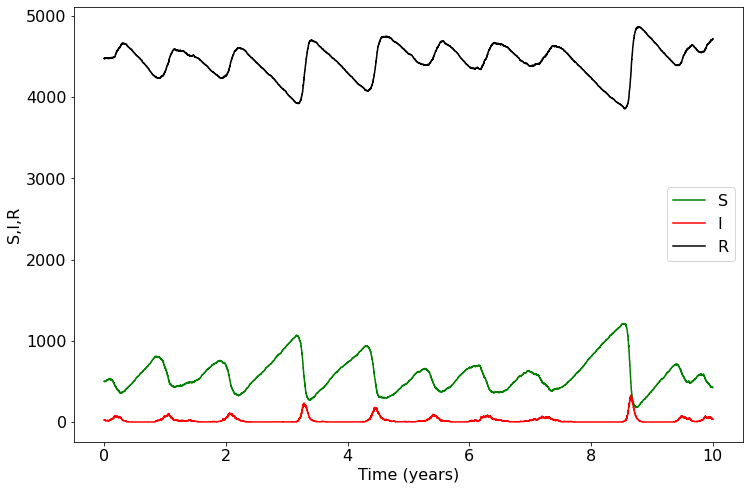

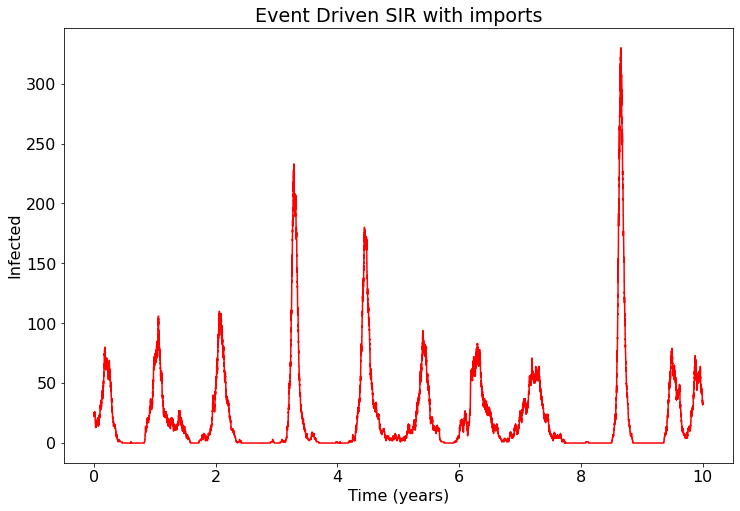

In [28]:
def stoc_eqs_imp(INP,ts):  
	V=INP
	N=np.sum(V[range(3)])
	Rate1 = beta*V[0]*V[1]/N
	Rate2 = gamma*V[1]
	Rate3 = mu*N
	Rate4 = mu*V[0]
	Rate5 = mu*V[1]
	Rate6 = mu*V[2]
	Rate7 = 0.0625*mu*(beta/gamma-1)*np.sqrt(N)
	R1=pl.rand()
	R2=pl.rand()
	s = Rate1 + Rate2 + Rate3 + Rate4 + Rate5 + Rate6 + Rate7
	ts = -np.log(R2)/s
	if R1<(Rate1/s):
		V[1] += 1
		V[0] -= 1 # do infection
	elif R1<(Rate2+Rate1)/s:
		V[1] -= 1
		V[2] += 1 # do recovery
	elif R1< (Rate2+Rate1+Rate3)/s:
		V[0] += 1 # birth
	elif R1< (Rate2+Rate1+Rate3+Rate4)/s:
		V[0] -= 1 # die S
	elif R1< (Rate2+Rate1+Rate3+Rate4+Rate5)/s:
		V[1] -= 1 #die I 
	elif R1< (Rate2+Rate1+Rate3+Rate4+Rate5+Rate6)/s:
		V[2] -= 1 #die R 
	else:
		V[1] += 1 #import
	return [V,ts]
def Stoch_Iteration_imp(INPUT, typesim):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	while T[lop] < ND  :
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		if typesim == "u":
			[res,ts] = stoc_eqs(INPUT,ts)
		elif typesim == "nodem":
			[res,ts] = stoc_eqs_nodem(INPUT,ts)
		elif typesim == "imp":
			[res,ts] = stoc_eqs_imp(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
	return [T,S,I,R]
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
[T,S,I,R]=Stoch_Iteration_imp(INPUT,"imp")


tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
plt.figure(figsize = (12, 8))
plt.plot(tT, tS, 'g',label="S")
plt.plot(tT, tI, 'r',label="I")
plt.plot(tT, tR, 'k',label="R")
plt.xlabel ('Time (years)')
plt.ylabel ('S,I,R')
plt.legend()
plt.show()
plt.figure(figsize = (12, 8))
plt.plot(tT, tI, 'r',label="I")
plt.xlabel ('Time (years)')
plt.ylabel ('Infected')
plt.title('Event Driven SIR with imports')
plt.show()

#   Meta-population

<ipython-input-29-b7d1cfa433eb>:35: RuntimeWarning: divide by zero encountered in double_scalars
  ts = -np.log(R2)/s
<ipython-input-29-b7d1cfa433eb>:36: RuntimeWarning: invalid value encountered in double_scalars
  if R1<(Rate1/s):
<ipython-input-27-ea2f3df01a01>:28: RuntimeWarning: divide by zero encountered in double_scalars
  ts = -np.log(R2)/s
<ipython-input-27-ea2f3df01a01>:29: RuntimeWarning: invalid value encountered in double_scalars
  if R1<(Rate1/s):
<ipython-input-27-ea2f3df01a01>:32: RuntimeWarning: invalid value encountered in double_scalars
  elif R1<(Rate2+Rate1)/s:


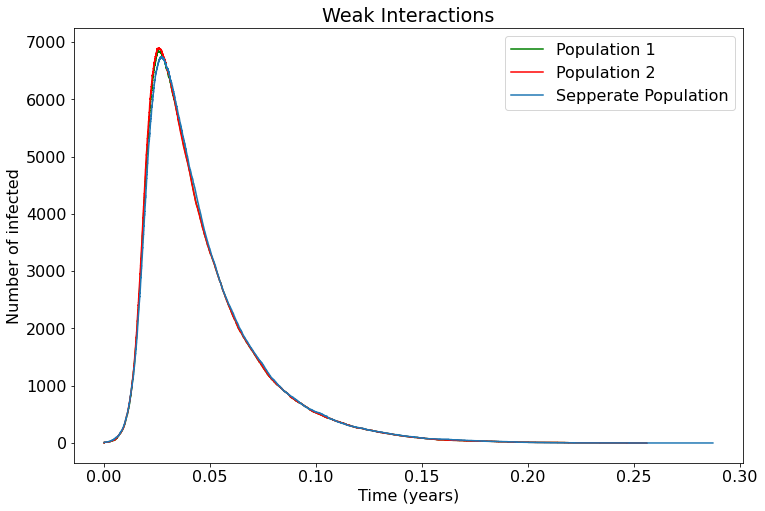

<ipython-input-29-b7d1cfa433eb>:35: RuntimeWarning: divide by zero encountered in double_scalars
  ts = -np.log(R2)/s
<ipython-input-29-b7d1cfa433eb>:36: RuntimeWarning: invalid value encountered in double_scalars
  if R1<(Rate1/s):
<ipython-input-27-ea2f3df01a01>:28: RuntimeWarning: divide by zero encountered in double_scalars
  ts = -np.log(R2)/s
<ipython-input-27-ea2f3df01a01>:29: RuntimeWarning: invalid value encountered in double_scalars
  if R1<(Rate1/s):
<ipython-input-27-ea2f3df01a01>:32: RuntimeWarning: invalid value encountered in double_scalars
  elif R1<(Rate2+Rate1)/s:


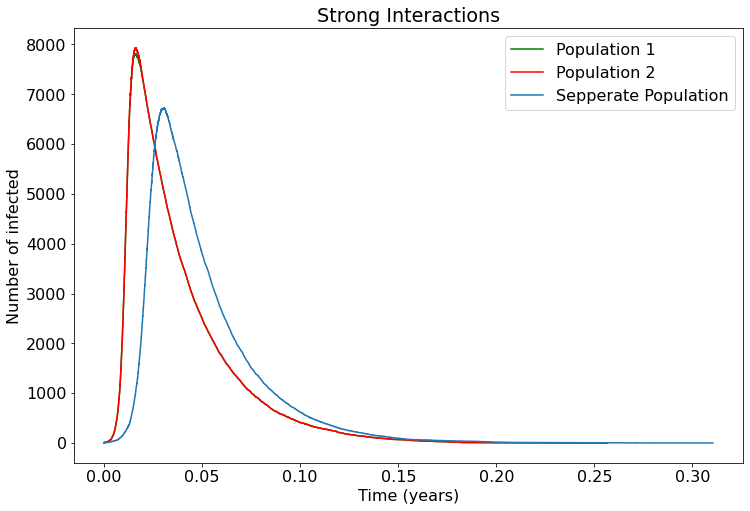

In [29]:

ND=MaxTime = 2*365
n=2
N0=10000
Y0=10
X0=9990
Z0=N0-X0-Y0


l=np.zeros((n,n))
for i in range(n):
	for j in range(n):
		if i==j: 
			l[i][j]=1
		else:
			l[i][j]=0.1     

def stoc_eqs_met(INP,ts,n):  
	V = INP   
	for i in range(n): # Calculate rates in Subpopulation i  from subpopulation i
		N = N0
		Rate1 = beta*(V[0][i])*(V[1][i])/N
		Rate2 = gamma*(V[1][i])
		Rate3 = 0
		Rate4 = 0
		Rate5 = 0
		Rate6 = 0
		Rate_j = np.zeros(n)
		for j in range(n): # Calculate rates in Subpopulation i  from subpopulation j i=/=j
			if j != i:
				Rate_j[j] = beta*(V[0][i])*(V[1][j])*(l[i][j])/N    
		R1=pl.rand()
		R2=pl.rand()
		Rate1 = Rate1 + np.sum(Rate_j) #total infection rate
		s = Rate1 + Rate2 
		ts = -np.log(R2)/s
		if R1<(Rate1/s):
			V[1][i] += 1
			V[0][i] -= 1# do infection
		else :
			V[1][i] -= 1
			V[2][i] += 1 # do recovery
	return [V,ts]
def Met(INPUT,n):
	lop=0
	ts=0
	T=[0]
	SIR = np.zeros((3,n))
	for i in range(n):
		while T[lop] < ND :
			lop=lop+1
			T.append(T[lop-1]+ts)
			SIR = np.dstack((SIR,INPUT))
			[res,ts] = stoc_eqs_met(INPUT,ts,n)
			lop=lop+1
			T.append(T[lop-1])
			SIR = np.dstack((SIR,INPUT))
	return [T,SIR]

INPUT = np.zeros((3,n))
for i in range(n): #initilization for populations of the same size and S,I,R
	INPUT[0][i]=X0
	INPUT[1][i]=Y0
	INPUT[2][i]=Z0
    
[T,SIR]=Met(INPUT,n)

T=np.array(T)/365
I1 = SIR[1,0,:]
I2 = SIR[1,1,:]
plt.figure(figsize = (12, 8))
plt.plot(T, I2, 'g',label="Population 1")
plt.plot(T, I1, 'r',label="Population 2 ")
N0=10000
Y0=10
X0=9990
Z0=N0-X0-Y0
INPUT = np.array((X0,Y0,Z0))
[T,S,I,R]=Stoch_Iteration_imp(INPUT,"nodem")
tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
plt.plot(tT, tI,label="Sepperate Population")
plt.xlabel ('Time (years)')
plt.ylabel ('Number of infected')
plt.legend()
plt.title("Weak Interactions")
plt.show()


N0=10000
Y0=10
X0=9990
Z0=N0-X0-Y0
INPUT = np.zeros((3,n))

for i in range(n): #initilization for populations of the same size and S,I,R
	INPUT[0][i]=X0
	INPUT[1][i]=Y0
	INPUT[2][i]=Z0
l=np.zeros((n,n))
for i in range(n):
	for j in range(n):
		if i==j: 
			l[i][j]=1
		else:
			l[i][j]=0.8 
[T,SIR]=Met(INPUT,n)

T=np.array(T)/365
I1 = SIR[1,0,:]
I2 = SIR[1,1,:]
plt.figure(figsize = (12, 8))
plt.plot(T, I2, 'g',label="Population 1")
plt.plot(T, I1, 'r',label="Population 2 ")


N0=10000
Y0=10
X0=9990
Z0=N0-X0-Y0
INPUT = np.array((X0,Y0,Z0))
[T,S,I,R]=Stoch_Iteration_imp(INPUT,"nodem")
tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
plt.plot(tT, tI,label="Sepperate Population")
plt.xlabel ('Time (years)')
plt.ylabel ('Number of infected')
plt.title("Strong Interactions")

plt.legend()
plt.show()





# New Metapopulation  

<ipython-input-29-b7d1cfa433eb>:35: RuntimeWarning: divide by zero encountered in double_scalars
  ts = -np.log(R2)/s
<ipython-input-29-b7d1cfa433eb>:36: RuntimeWarning: invalid value encountered in double_scalars
  if R1<(Rate1/s):


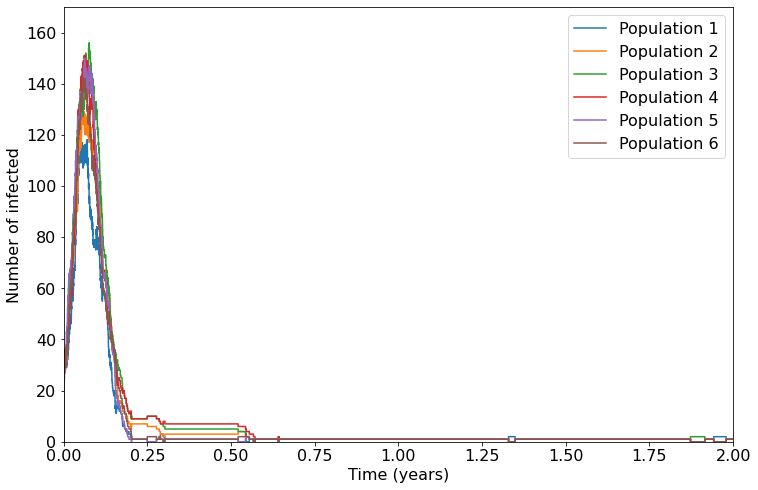

<ipython-input-33-e7834ed5c1bf>:58: RuntimeWarning: divide by zero encountered in double_scalars
  ts = -np.log(R2)/s
<ipython-input-33-e7834ed5c1bf>:59: RuntimeWarning: invalid value encountered in double_scalars
  if R1<(Rate1/s):
<ipython-input-33-e7834ed5c1bf>:62: RuntimeWarning: invalid value encountered in double_scalars
  elif R1<(Rate1 + Rate2)/s:
<ipython-input-33-e7834ed5c1bf>:65: RuntimeWarning: divide by zero encountered in double_scalars
  elif R1<(Rate1 + Rate2 + Rate3)/s:


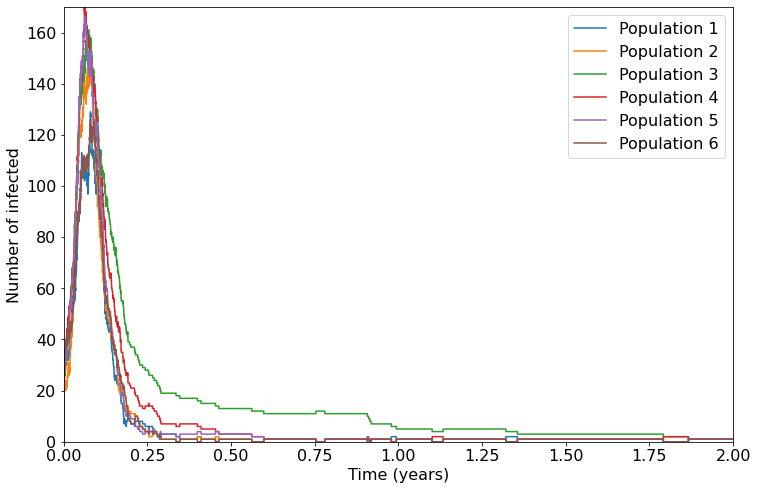

In [33]:
ND=MaxTime = 5*365

N0=5000
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0
n=6
INPUT = np.zeros((3,n))
for i in range(n): #initilization for populations of the same size and S,I,R
	INPUT[0][i]=X0
	INPUT[1][i]=Y0
	INPUT[2][i]=Z0
l=np.zeros((n,n))
for i in range(n):
	for j in range(n):
		if i==j: 
			l[i][j]=1
		elif abs(i-j)==1: 
			l[i][j]=0.4
		elif abs(i-j)==2: 
			l[i][j]=0.3
		elif abs(i-j)==3: 
			l[i][j]=0.2
		else:
			l[i][j]=0.1 
[T,SIR]=Met(INPUT,n)

T=np.array(T)/365
plt.figure(figsize = (12, 8))
for i in range(n):
    I = SIR[1,i,:]
    plt.plot(T, I,label=f"Population {i+1}")
plt.xlabel('Time (years)')
plt.ylabel('Number of infected')
plt.legend()
plt.xlim([0, 2])
plt.ylim([0, 170])
plt.show()

def stoc_eqs_met2(INP,ts,n):  
	V = INP   
	for i in range(n): # Calculate rates in Subpopulation i  from subpopulation i
		N = N0
		Rate1 = beta*(V[0][i])*(V[1][i])/N
		Rate2 = gamma*(V[1][i])
		Rate3 = mu*N
		Rate4 = mu*V[0][i]
		Rate5 = mu*V[1][i]
		Rate6 = mu*V[2][i]
		Rate_j = np.zeros(n)
		for j in range(n): # Calculate rates in Subpopulation i  from subpopulation j i=/=j
			if j != i:
				Rate_j[j] = beta*(V[0][i])*(V[1][j])*(l[i][j])/N    
		R1=pl.rand()
		R2=pl.rand()
		Rate1 = Rate1 + np.sum(Rate_j) #total infection rate
		s = Rate1 + Rate2 
		ts = -np.log(R2)/s
		if R1<(Rate1/s):
			V[1][i] += 1
			V[0][i] -= 1# do infection
		elif R1<(Rate1 + Rate2)/s:
			V[1][i] -= 1
			V[2][i] += 1 # do recovery
		elif R1<(Rate1 + Rate2 + Rate3)/s:
			V[0][i] += 1
		elif R1<(Rate1 + Rate2 + Rate3+ Rate4)/s:
			V[0][i] -= 1
		elif R1<(Rate1 + Rate2 + Rate3+ Rate4 +Rate5)/s:
			V[1][i] -= 1
		else:
			V[2][i] -= 1
	return [V,ts]
def Met1(INPUT,n):
	lop=0
	ts=0
	T=[0]
	SIR = np.zeros((3,n))
	for i in range(n):
		while T[lop] < ND :
			lop=lop+1
			T.append(T[lop-1]+ts)
			SIR = np.dstack((SIR,INPUT))
			[res,ts] = stoc_eqs_met2(INPUT,ts,n)
			lop=lop+1
			T.append(T[lop-1])
			SIR = np.dstack((SIR,INPUT))
	return [T,SIR]
INPUT = np.zeros((3,n))
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

for i in range(n): #initilization for populations of the same size and S,I,R
	INPUT[0][i]=X0
	INPUT[1][i]=Y0
	INPUT[2][i]=Z0

[T,SIR]=Met1(INPUT,n)

T=np.array(T)/365
plt.figure(figsize = (12, 8))
for i in range(n):
    I = SIR[1,i,:]
    plt.plot(T, I,label=f"Population {i+1}")
plt.xlabel('Time (years)')
plt.ylabel('Number of infected')
plt.xlim([0, 2])
plt.ylim([0, 170])
plt.legend()
plt.show()

In [31]:
import numpy as np
import ndlib as nd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison

def max_nodes(g, N):
    degrees = [val for (node, val) in g.degree()]
    inds = [node for (node, val) in g.degree()]
    dic = {}
    for key in inds:
        for value in degrees:
            dic[key] = value
            degrees.remove(value)
            break
        
    dic1 = dict(sorted(dic.items(), key=lambda dic: dic[1]))
    maxs = list(dic1.keys())[-N:]
    
    return maxs

def setSIR(g, beta, gamma, init_infected, time):
    model = ep.SIRModel(g)

    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta) # infection rate
    cfg.add_model_parameter('gamma', gamma) # recovery rate

    cfg.add_model_parameter("percentage_infected", init_infected)
    model.set_initial_status(cfg)

    iterations = model.iteration_bunch(time, node_status=True)
    trends = model.build_trends(iterations)
    
    return iterations, trends

def setSIR_custom_init(g, beta, gamma, infected_arr, time):
    model = ep.SIRModel(g)

    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta) # infection rate
    cfg.add_model_parameter('gamma', gamma) # recovery rate

    cfg.add_model_initial_configuration("Infected", infected_nodes)
    model.set_initial_status(cfg)

    iterations = model.iteration_bunch(time, node_status=True)
    trends = model.build_trends(iterations)
    
    return iterations, trends

def getInfecteds(trends):
    return list(trends[0].get('trends').get('node_count').values())[1]

def normalize(array, norm):
    return np.divide(array, norm)

def vacc(g, n_vaccs):
    nodes = max_nodes(g, n_vaccs)
    g.remove_nodes_from(nodes)
    
    return g
    
def vacc_rand(g, n_vaccs):
    size = g.number_of_nodes()
    nodes = np.random.randint(1, size, n_vaccs)
    g.remove_nodes_from(nodes)
    
    return g

ModuleNotFoundError: No module named 'ndlib'

In [ ]:
size = 80
p = 0.1

g = nx.erdos_renyi_graph(size, p)

time = 500
prcnt_inf = 0.02
beta, gamma = 0.01, 0.005

model = ep.SIRModel(g)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', beta) # infection rate
cfg.add_model_parameter('gamma', gamma) # recovery rate

cfg.add_model_parameter("percentage_infected", prcnt_inf)
model.set_initial_status(cfg)

iterations = model.iteration_bunch(time, node_status=True)
trends = model.build_trends(iterations)

%matplotlib inline
plt.figure()
viz = DiffusionTrend(model, trends)
viz.plot('SIRonNetwork_plot_example')

matplotlib.use('QtAgg')

%matplotlib inline
plt.figure(figsize=(10, 8))
nx.draw(g)
plt.savefig('SIR_graph_example')

In [ ]:
%matplotlib inline

g1 = nx.barabasi_albert_graph(100, 4)
fig = plt.figure(1, figsize=(20, 15))
nx.draw(g1, with_labels=True, font_weight='normal', node_size=800, width=1)
plt.savefig('BA_example1')
plt.show()

g2 = nx.watts_strogatz_graph(100, 8, 0.5)
fig = plt.figure(1, figsize=(20, 15))
nx.draw(g2, with_labels=True, font_weight='normal', node_size=800, width=1)
plt.savefig('WS_example1')
plt.show()

g3 = nx.erdos_renyi_graph(100, 0.08)
fig = plt.figure(1, figsize=(20, 15))
nx.draw(g3, with_labels=True, font_weight='normal', node_size=800, width=1)
plt.savefig('ER_example1')
plt.show()

In [ ]:
print(g1.number_of_edges(), g2.number_of_edges(), g3.number_of_edges())

In [ ]:
%matplotlib inline

g11 = nx.barabasi_albert_graph(100, 1)
fig = plt.figure(1, figsize=(20, 15))
nx.draw(g11, with_labels=True, font_weight='normal', node_size=800, width=1)
plt.savefig('BA_example2')
plt.show()


g22 = nx.watts_strogatz_graph(100, 2, 0.3)
fig = plt.figure(1, figsize=(20, 15))
nx.draw(g22, with_labels=True, font_weight='normal', node_size=800, width=1)
plt.savefig('WS_example2')
plt.show()

g33 = nx.erdos_renyi_graph(100, 0.03)
fig = plt.figure(1, figsize=(20, 15))
nx.draw(g33, with_labels=True, font_weight='normal', node_size=800, width=1)
plt.savefig('ER_example2')
plt.show()

In [ ]:
size = 200
k = 11
p = 0.05

gba = nx.barabasi_albert_graph(size, k)
gws = nx.watts_strogatz_graph(size, 20, p)
ger = nx.erdos_renyi_graph(size, 0.1)


beta, gamma = 0.1, 0.08
init_infected = 0.01 # proportion
t = 70 # number of iterations

ba_iters, ba_trends = setSIR(gba, beta, gamma, init_infected, t)
ws_iters, ws_trends = setSIR(gws, beta, gamma, init_infected, t)
er_iters, er_trends = setSIR(ger, beta, gamma, init_infected, t)

%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(getInfecteds(ba_trends), label='Barabasi-Alber')
plt.plot(getInfecteds(ws_trends), label='Watts-Strogatz')
plt.plot(getInfecteds(er_trends), 'r', label='Erdos-Renyi')
plt.xlabel('Iterations', fontsize='large')
plt.ylabel('Infected nodes', fontsize='large')
plt.legend()
plt.savefig("Comparison_example")

print(gba.number_of_edges(), gws.number_of_edges(), ger.number_of_edges())

In [ ]:
iarr, ba_arr, ws_arr, er_arr = [], [], [], []
t = 500
for i in range(t):
    ba_iters, ba_trends = setSIR(gba, beta, gamma, init_infected, t)
    ws_iters, ws_trends = setSIR(gws, beta, gamma, init_infected, t)
    er_iters, er_trends = setSIR(ger, beta, gamma, init_infected, t)
    
    ba_maxinf = max(normalize(getInfecteds(ba_trends), size))
    ws_maxinf = max(normalize(getInfecteds(ws_trends), size))
    er_maxinf = max(normalize(getInfecteds(er_trends), size))
     
    iarr.append(i)
    ba_arr.append(ba_maxinf)
    ws_arr.append(ws_maxinf)
    er_arr.append(er_maxinf)

ba_avg = np.average(ba_arr); ws_avg = np.average(ws_arr); er_avg = np.average(er_arr)
ba_avgs, ws_avgs, er_avgs = [], [], []
for i in range(t):
    ba_avgs.append(ba_avg)
    ws_avgs.append(ws_avg)
    er_avgs.append(er_avg)
    

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(iarr, ba_arr, 'b', linewidth=0.7, label='Barabasi-Albert')
plt.plot(iarr, ws_arr, 'g', linewidth=0.7, label='Watts-Strogatz')
plt.plot(iarr, er_arr, 'r', linewidth=0.7, label='Erdos-Renyi')

plt.plot(iarr, ba_avgs, 'b', linestyle='dashed', label='Barabasi-Albert mean')
plt.plot(iarr, ws_avgs, 'g', linestyle='dashed', label='Watts-Strogatz mean')
plt.plot(iarr, er_avgs, 'r', linestyle='dashed', label='Erdos-Renyi mean')

plt.xlabel('Iterations', fontsize='large')
plt.ylabel('Maximal % of infected nodes', fontsize='large')
plt.legend()
plt.savefig("Comparison_full")

In [ ]:
print(ba_avg, ws_avg, er_avg)

In [ ]:
 ''' (b) Nodes' degrees and sread of infection '''

size = 200
k = 7
p = 0.04

g = nx.barabasi_albert_graph(size, k)

plt.figure(figsize=(20,10))
n = 10
prcnt_inf = n / size
time = 80

beta = 0.01
gamma = 0.001

avg1_arr = []
for i in range(5):
    iterations, trends = setSIR(g.copy(), beta, gamma, prcnt_inf, time)
    arr1 = normalize(getInfecteds(trends), size)
    
    avg1_arr.append(max(arr1))
    if i ==0:  plt.plot(arr1, 'b', label='Standard initial conditions')
    else: plt.plot(arr1, 'b')
        
avg1 = sum(avg1_arr) / len(avg1_arr)

avg2_arr = []
for i in range(5):  
    infected_nodes = max_nodes(g.copy(), n)
    iterations, trends = setSIR_custom_init(g.copy(), beta, gamma, infected_nodes, time)
    arr2 = normalize(getInfecteds(trends), size)

    avg2_arr.append(max(arr2))
    if i ==0:  plt.plot(arr2,'r', label='Iinitally infected only nodes with highest centrality')
    else: plt.plot(arr2,'r')
        
avg2 = sum(avg2_arr) / len(avg2_arr)   

plt.legend()
plt.xlabel('Iterations', fontsize = 'large')
plt.ylabel('% of infected population', fontsize = 'large')
plt.savefig("degrees_infection_plot")
plt.show()

print(avg1)
print(avg2)

matplotlib.use('QtAgg')

plt.figure(figsize=(10,10), dpi=200)
nx.draw(g, font_weight='normal', node_size=10, width=0.1)
plt.savefig("degrees_infection_graph")
plt.show()

In [ ]:
""" (c) Vaccination """

size = 300
k = 10
beta, gamma = 0.01, 0.007
prcnt_inf = 0.02
time = 400


g = nx.barabasi_albert_graph(size, k)


%matplotlib inline
matplotlib.use('QtAgg')
fig = plt.figure(figsize=(20, 10))


iterations1, trends1 = setSIR(g, beta, gamma, prcnt_inf, time)

arr1 = normalize(getInfecteds(trends1), size)
plt.plot(arr1, 'm', label = 'Without vaccination')


v = np.arange(0.05, 0.7, 0.2)
for i in v:
    prop_vacc = i
    N = int(round(size * prop_vacc))
    
    g2 = vacc(g.copy(), N)
    
    iterations2, trends2 = setSIR(g2, beta, gamma, prcnt_inf, time)

    arr2 = normalize(getInfecteds(trends2), size)
    

    plt.plot(arr2, 'g', label = 'Targeted vaccination')

    vtext = 'v = ' + str(round(prop_vacc,2))
    
    maxx = max(arr2)
    maxind = np.unravel_index(np.argmax(arr2, axis=None), arr2.shape)[0]
    
    if maxind > 50:
        plt.text(maxind - 20, maxx, vtext, fontsize='large')
        plt.hlines(y=maxx, xmin=maxind, xmax=0, linewidth=1, color='k', linestyle = 'dashed')
    else:
        plt.text(150, maxx, vtext, fontsize='large')
        plt.hlines(y=maxx, xmin=maxind, xmax=0, linewidth=1, color='k', linestyle = 'dashed')
    
plt.xlabel('Iterations', fontsize = 'large')
plt.ylabel('% of infected population', fontsize = 'large')
plt.xlim(0, time)
plt.grid()
plt.savefig("Vaccination_example")
plt.show()    

In [ ]:
size = 300
k = 10
beta, gamma = 0.01, 0.007
prcnt_inf = 0.02
time = 400

g = nx.barabasi_albert_graph(size, k)

errs = []
maxs_avg_arr = []
v = np.arange(0, 1, 0.1)
for j in v:
    prop_vacc = j 
    N = int(round(size * prop_vacc))
    
    maxs = []
    for i in range(100):
        g2 = vacc_rand(g.copy(), N)
        
        iterations, trends = setSIR(g2, beta, gamma, prcnt_inf, time)
        
        arr2 = normalize(getInfecteds(trends), size)
        maxs.append(max(arr2))
    maxs_avg = sum(maxs) / len(maxs)
    maxs_avg_arr.append(maxs_avg)

In [ ]:
print(maxs_avg_arr)

In [ ]:
%matplotlib inline
matplotlib.use('QtAgg')
fig = plt.figure(figsize=(20, 10))
plt.plot(v, maxs_avg_arr, 'bo')
plt.plot(v, maxs_avg_arr, linestyle='dashed', linewidth=0.7)

liney = [maxs_avg_arr[0], maxs_avg_arr[-1]]
linex = [v[0], v[-1]]
plt.plot(linex, liney, 'r', linewidth=0.7)

for i in range(len(v)):
    vtext = 'v = ' + str(round(v[i],2))
    plt.text(v[i]+0.0045, maxs_avg_arr[i], vtext, fontsize='large')
    
plt.xlim(-0.01,0.95)
plt.xlabel('Proportion of vaccinated population', fontsize='large')
plt.ylabel('% of infected population', fontsize='large')
plt.grid()
plt.savefig("Effectivness_of_vaccination")